In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
mean1 = 55
std_dev1 = 10
num_samples = 500

column1_numbers = np.random.normal(mean1, std_dev1, num_samples)
column1_numbers = np.clip(column1_numbers, 30, 120)
column1_numbers = np.round(column1_numbers).astype(int)

mean2 = 18
std_dev2 = 3

column2_numbers = np.random.normal(mean2, std_dev2, num_samples)
column2_numbers = np.clip(column2_numbers, 12, 26)
column2_numbers = np.round(column2_numbers).astype(int)

column3_numbers = np.random.randint(2, size = num_samples)
column3_numbers[column1_numbers > mean1] = 1

data = {
    'Miles_Per_week': column1_numbers, 
    'farthest_run' : column2_numbers,
    'Qualified_for_Marathon': column3_numbers
}
df = pd.DataFrame(data)


In [9]:
df

,Miles_Per_week,farthest_run,Qualified_for_Marathon
0,59,18,1
1,58,22,1
2,69,18,1
3,55,20,1
4,64,18,1
...,...,...,...
495,65,18,1
496,61,20,1
497,52,21,1
498,52,19,1


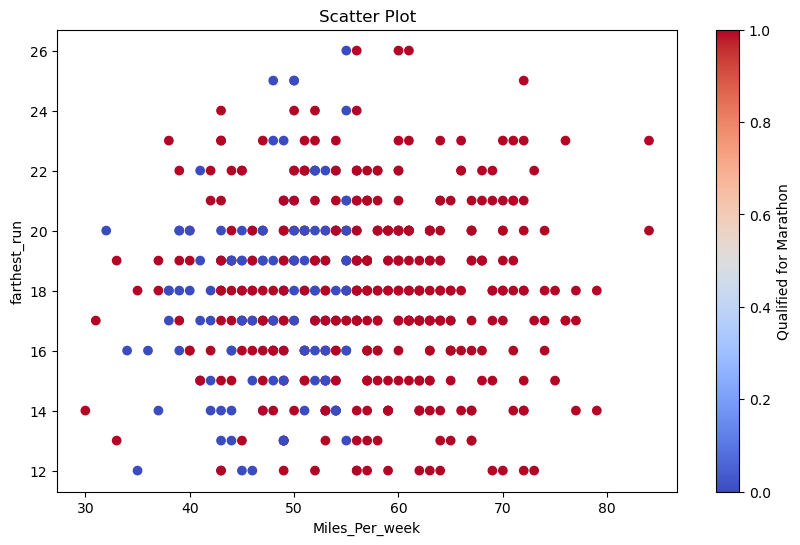

In [10]:
plt.figure(figsize = (10, 6))
plt.scatter(df['Miles_Per_week'], df['farthest_run'], c = df['Qualified_for_Marathon'], cmap = 'coolwarm')
plt.xlabel('Miles_Per_week')
plt.ylabel('farthest_run')
plt.title('Scatter Plot')
plt.colorbar(label = 'Qualified for Marathon')
plt.show()

In [11]:
X = df.iloc[:, 0:2]
y = df.iloc[:, 2]

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 33, test_size = 0.2)

In [14]:
from sklearn.svm import SVC

In [15]:
model = SVC()

In [16]:
model.fit(X_train, y_train)

SVC()

### Parameters

## 1. Regularization

In [17]:
model_reg0 = SVC(C = 0.1) 
model_reg0.fit(X_train, y_train)
model_reg0.score(X_test, y_test)

0.78

In [18]:
model_reg1 = SVC(C = 1) 
model_reg1.fit(X_train, y_train)
model_reg1.score(X_test, y_test)

0.78

In [19]:
model_reg1 = SVC(C = 1000) 
model_reg1.fit(X_train, y_train)
model_reg1.score(X_test, y_test)

0.79

Higher values of ( C ) can lead to a tighter decision boundary that may fit the training data well but risk overfitting.


##  2. Gamma

In [20]:
model_gamma0 = SVC(gamma = 0.1) 
model_gamma0.fit(X_train, y_train)
model_gamma0.score(X_test, y_test)

0.8

In [21]:
model_gamma1 = SVC(gamma = 1) 
model_gamma1.fit(X_train, y_train)
model_gamma1.score(X_test, y_test)

0.76

In [25]:
model_gamma2 = SVC(gamma = 1000) 
model_gamma2.fit(X_train, y_train)
model_gamma2.score(X_test, y_test)

0.77

## 3. Kernel

In [27]:
model_linear = SVC(kernel = 'linear')
model_linear.fit(X_train, y_train)
model_linear.score(X_test, y_test)


0.78

In [28]:
model_linear = SVC(kernel = 'rbf')
model_linear.fit(X_train, y_train)
model_linear.score(X_test, y_test)

0.78